In [86]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.metrics import confusion_matrix 

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train_flattened = X_train.reshape(60000, 784)
X_train_flattened.shape

(60000, 784)

In [15]:
X_test_flattened = X_test.reshape(10000, 784)
X_test_flattened.shape

(10000, 784)

In [72]:
ann1 = keras.Sequential([    
                         keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
                         ])

ann1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann1.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4689 - accuracy: 0.8765
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2583 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9284
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2534 - accuracy: 0.9306
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.250

In [73]:
ann1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2634 - accuracy: 0.9267


[0.26339638233184814, 0.9266999959945679]

In [74]:
y_pred = ann1.predict(X_test_flattened)
y_pred_labels = [np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)

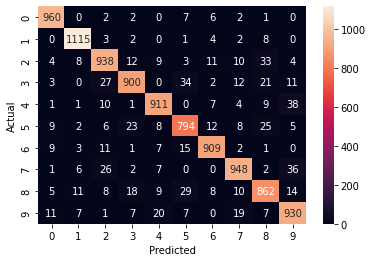

In [75]:
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [76]:
ann2 = keras.Sequential([
                         keras.layers.Dense(32, input_shape=(784,), activation='relu'),
                         keras.layers.Dense(32, activation = 'relu'),
                         keras.layers.Dense(10, activation=tf.keras.activations.softmax)
                         ])

ann2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3399 - accuracy: 0.9010
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1721 - accuracy: 0.9492
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1363 - accuracy: 0.9594
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9646
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9693
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9728
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0802 - accuracy: 0.9752
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.9777
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9797
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.060

In [77]:
ann2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9673


[0.11508337408304214, 0.9672999978065491]

In [78]:
ann3 = keras.Sequential([
                         keras.layers.Dense(32, input_shape=(784,), activation = 'relu'),
                         keras.layers.Dense(32, activation = 'relu'),
                         keras.layers.Dense(10, activation = tf.keras.activations.softmax)
                         ])

ann3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann3.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7929 - accuracy: 0.7740
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3228 - accuracy: 0.9066
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2706 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2396 - accuracy: 0.9298
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2159 - accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1974 - accuracy: 0.9426
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1822 - accuracy: 0.9468
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1699 - accuracy: 0.9505
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1590 - accuracy: 0.9537
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.149

In [79]:
ann3.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1503 - accuracy: 0.9540


[0.150263249874115, 0.9539999961853027]

In [80]:
model = Sequential()

model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.7067 - accuracy: 0.8000
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3252 - accuracy: 0.9069
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2756 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2445 - accuracy: 0.9294
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2227 - accuracy: 0.9361
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2052 - accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1901 - accuracy: 0.9455
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1781 - accuracy: 0.9494
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1668 - accuracy: 0.9528
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1575 - accurac

In [66]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2017 - accuracy: 0.9425


[0.20173612236976624, 0.9424999952316284]

In [84]:
model2 = Sequential()

model2.add(Dense(32, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.5)
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.3293 - accuracy: 0.8994
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1703 - accuracy: 0.9497
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1380 - accuracy: 0.9586
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1214 - accuracy: 0.9631
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0990 - accuracy: 0.9696
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0951 - accuracy: 0.9700
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0879 - accuracy: 0.9729
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0830 - accuracy: 0.9746
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0787 - accurac

In [85]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1280 - accuracy: 0.9637


[0.12795546650886536, 0.963699996471405]

In [93]:
model3 = Sequential()

model3.add(Dense(32, input_shape=(784,)))
model3.add(Activation('relu'))
model3.add(Dense(32))
model3.add(Activation('relu'))
model3.add(Dense(32))
model3.add(Activation('relu'))
model3.add(Dense(10))
model3.add(Activation('softmax'))

adam = Adam(lr=5e-4)
model3.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy'])
model3.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4311 - accuracy: 0.8774
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1935 - accuracy: 0.9445
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1485 - accuracy: 0.9570
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1228 - accuracy: 0.9634
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1083 - accuracy: 0.9683
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956 - accuracy: 0.9712
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0871 - accuracy: 0.9736
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9762
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0727 - accuracy: 0.9776
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0679 - accurac

In [94]:
model3.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9681


[0.10547640174627304, 0.9681000113487244]